In [2]:
import numpy as np
import matplotlib.pyplot as plt

from glob import glob

In [3]:
# Load the data
data_dir = "../output/logistic_sweep/"

metric_files = glob(data_dir + "*metrics.csv")

metric_arrays = [np.loadtxt(f, delimiter=",") for f in metric_files]

In [4]:
gates = [
    file_name.split("/")[-1].split(".")[0].split("_")[0] for file_name in metric_files
]

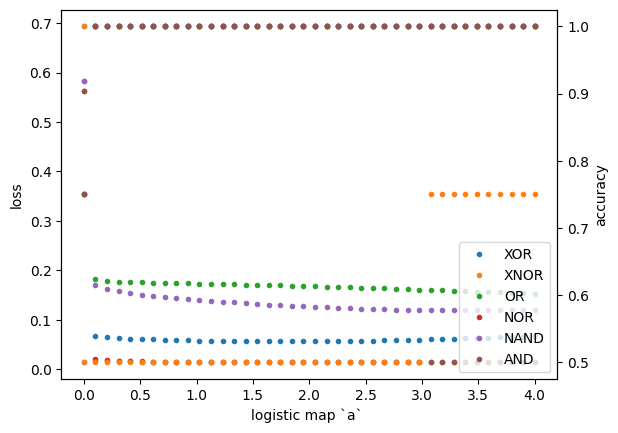

In [10]:
# Plot the data
fig, ax = plt.subplots()
for i, data in enumerate(metric_arrays):
    ax.plot(data[:, 0], data[:, 1], ".", label=gates[i])

ax.set_xlabel("logistic map `a` ")
ax.set_ylabel("loss")

# add axis to the right for accuracy
ax2 = ax.twinx()
for i, data in enumerate(metric_arrays):
    ax2.plot(data[:, 0], data[:, 2], ".", label=gates[i])

ax2.set_ylabel("accuracy")

ax2.legend()
plt.show()

In [ ]:
# plot all the gate parameters
fig, ax = plt.subplots()